In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
rovio = pd.read_csv('Rovio.csv', sep = ';', decimal = ',', skiprows=1)

rovio.index = pd.to_datetime(rovio['Date'],dayfirst=True)
rovio.sort_index(inplace = True)
rovio.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2017-09-29,2017-09-29,11.49,11.50,12.00,12.34,11.35,11.50,11.789,51178598,5.918232e+08,21737,NaN
2017-10-02,2017-10-02,11.15,11.18,11.50,11.60,10.90,11.17,11.131,2910306,3.239390e+07,5683,NaN
2017-10-03,2017-10-03,11.13,11.14,11.17,11.17,10.67,11.14,10.927,1611652,1.760955e+07,3389,NaN
2017-10-04,2017-10-04,10.81,10.82,11.10,11.10,10.72,10.75,10.857,683842,7.424724e+06,1381,NaN
2017-10-05,2017-10-05,11.32,11.33,10.80,11.34,10.70,11.23,11.109,830471,9.225428e+06,1975,NaN


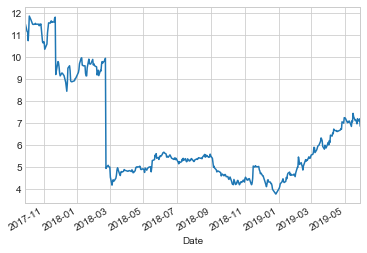

In [4]:
rovio['Closing price'].plot()

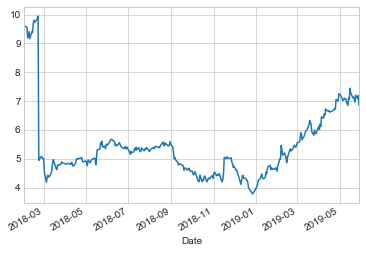

In [5]:
#Ennen romahdusta
rovio['Closing price']['2018-02':].plot()

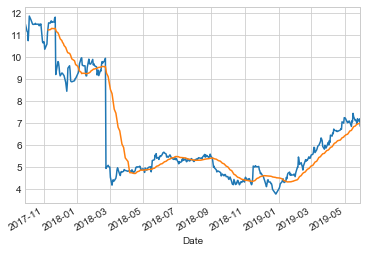

In [9]:
#30 päivän liukuva keskiarvo

rovio['Closing price'].plot()

rovio['Closing price'].rolling(30).mean().plot()

In [10]:
rovio['rovio_muutos'] = rovio['Closing price'].pct_change()
rovio.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,rovio_muutos
Date,,,,,,,,,,,,,
2017-09-29,2017-09-29,11.49,11.50,12.00,12.34,11.35,11.50,11.789,51178598,5.918232e+08,21737,NaN,NaN
2017-10-02,2017-10-02,11.15,11.18,11.50,11.60,10.90,11.17,11.131,2910306,3.239390e+07,5683,NaN,-0.028696
2017-10-03,2017-10-03,11.13,11.14,11.17,11.17,10.67,11.14,10.927,1611652,1.760955e+07,3389,NaN,-0.002686
2017-10-04,2017-10-04,10.81,10.82,11.10,11.10,10.72,10.75,10.857,683842,7.424724e+06,1381,NaN,-0.035009
2017-10-05,2017-10-05,11.32,11.33,10.80,11.34,10.70,11.23,11.109,830471,9.225428e+06,1975,NaN,0.044651


In [12]:
muutos= rovio['rovio_muutos']
muutos.head()

Date
2017-09-29         NaN
2017-10-02   -0.028696
2017-10-03   -0.002686
2017-10-04   -0.035009
2017-10-05    0.044651
Name: rovio_muutos, dtype: float64

[Text(0, 0, '-60.0 %'),
 Text(0, 0, '-50.0 %'),
 Text(0, 0, '-40.0 %'),
 Text(0, 0, '-30.0 %'),
 Text(0, 0, '-20.0 %'),
 Text(0, 0, '-10.0 %'),
 Text(0, 0, '0.0 %'),
 Text(0, 0, '10.0 %')]

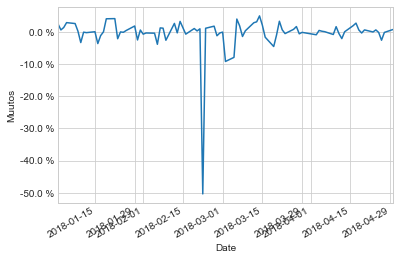

In [22]:
ax1 = muutos['2018-01':'2018-04'].plot()
ax1.set_ylabel('Muutos')
vals= ax1.get_yticks()
ax1.set_yticklabels(['{:.1f} %'.format(y*100) for y in vals])

In [23]:
muutos.describe()

count    415.000000
mean      -0.000426
std        0.035864
min       -0.503417
25%       -0.011440
50%        0.000000
75%        0.012689
max        0.124722
Name: rovio_muutos, dtype: float64

In [29]:
#Yli 10% muutosten päivämäärät:
muutos[(rovio['rovio_muutos']<-0.1) | (rovio['rovio_muutos']>0.1)]

Date
2017-11-23   -0.220812
2018-02-22   -0.503417
2018-11-16    0.124722
Name: rovio_muutos, dtype: float64

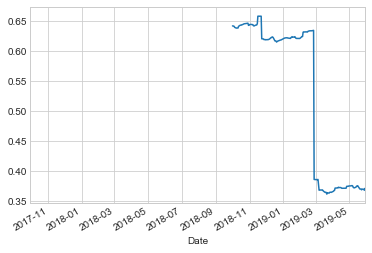

In [31]:
#Volatiliteetti
(rovio['rovio_muutos'].rolling(252).std()*(252**0.5)).plot()

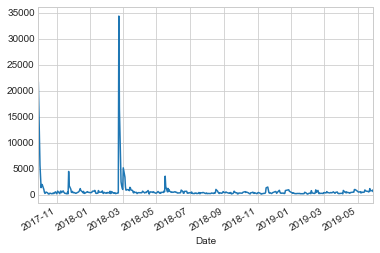

In [43]:
#osakkeiden myynti. Piikit alussa ja romahduksessa.
rovio['Trades'].plot()